In [2]:
from functions import *
import cmapy
import torch.utils.data

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Only GPU 1 is visible to this code

ModuleNotFoundError: No module named 'functions'

# faultSeg


In [2]:
mask = 0
imagenumber = 0
folderpath = "/data/anyu/faultSegData/train/fault/"
for filename in os.listdir(folderpath):  
    img = np.fromfile(folderpath + filename,dtype=np.single)
    imagenumber += 1
#     print(img.shape)
#     print(np.unique(img))
#     print(img.sum())
    mask += img.sum()

print(imagenumber)
total = 128*128*128*imagenumber
print(mask, total, mask/total)

200
29413683.0 419430400 0.07012768507003785


In [3]:
data = []
folderpath = "/data/anyu/faultSegData/train/seis"
for filename in os.listdir(folderpath):  
    img = np.fromfile("{}/{}".format(folderpath,filename),dtype=np.single).reshape(128,128,128)
    data.extend(img.flatten())
folderpath = "/data/anyu/faultSegData/validation/seis"
for filename in os.listdir(folderpath):  
    img = np.fromfile("{}/{}".format(folderpath,filename),dtype=np.single).reshape(128,128,128)
    data.extend(img.flatten())

In [4]:
my_array = np.asarray(data)
print(my_array.shape)
print(my_array.max(), my_array.min(), my_array.mean(), my_array.std())

(461373440,)
8.168264 -7.8922825 0.0003510037 1.0516963


{'whiskers': [<matplotlib.lines.Line2D at 0x7f40d7052940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40d6fe9080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40d70524e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f40d6fe9780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f40d6fe9b00>],
 'means': []}

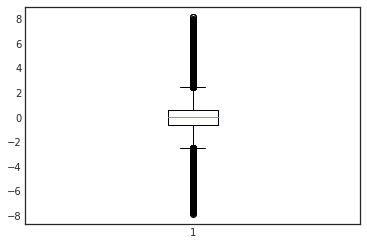

In [5]:
plt.boxplot(my_array)

In [6]:
# finding the 1st quartile
q1 = np.quantile(my_array, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(my_array, 0.75)
med = np.median(my_array)
 
# finding the iqr region
iqr = q3-q1
print(iqr)
 
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

upperoutlier = (my_array>upper_bound).sum()
loweroutlier = (my_array<lower_bound).sum()

print(upperoutlier, loweroutlier)

upper_bound3iqr = q3+(3*iqr)
lower_bound3iqr = q1-(3*iqr)
print(upper_bound3iqr, lower_bound3iqr)

upperoutlier3iqr = (my_array>upper_bound3iqr).sum()
loweroutlier3iqr = (my_array<lower_bound3iqr).sum()

print(upperoutlier3iqr, loweroutlier3iqr)

1.2452346235513687
2.48643109947443 -2.4945073947310448
6737050 6113423
4.354283034801483 -4.362359330058098
145675 133682


5.185158 -5.203067 -0.0008778011 1.0083274


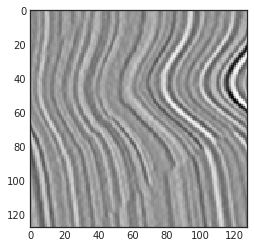

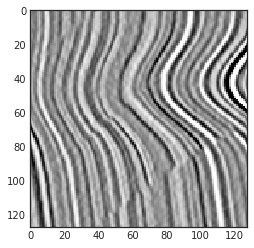

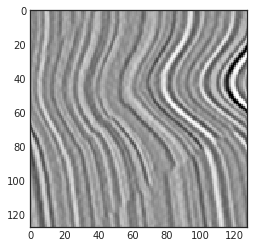

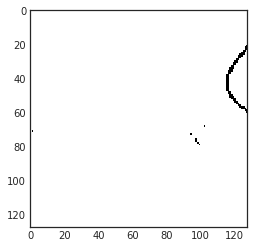

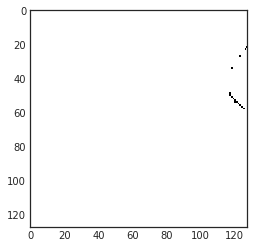

In [8]:
filename = "0"
img = np.fromfile("/data/anyu/faultSegData/train/seis/{}.dat".format(filename),dtype=np.single).reshape(128,128,128)
cubeslice = img[0]
plt.figure()
plt.imshow(cubeslice)
print(cubeslice.max(), cubeslice.min(), cubeslice.mean(), cubeslice.std())
plt.figure()
plt.imshow(np.clip(cubeslice, lower_bound, upper_bound))
plt.figure()
plt.imshow(np.clip(cubeslice, lower_bound3iqr, upper_bound3iqr))
plt.figure()
plt.imshow(cubeslice>upper_bound)
plt.figure()
plt.imshow(cubeslice>upper_bound3iqr)

In [9]:
afterclip = np.clip(my_array, lower_bound, upper_bound)
print(afterclip.max(), afterclip.min(), afterclip.mean(), afterclip.std())
afterclip3iqr = np.clip(my_array, lower_bound3iqr, upper_bound3iqr)
print(afterclip3iqr.max(), afterclip3iqr.min(), afterclip3iqr.mean(), afterclip3iqr.std())
minmaxnorm = (my_array-my_array.min())/(my_array.max()-my_array.min())
print(minmaxnorm.max(), minmaxnorm.min(), minmaxnorm.mean(), minmaxnorm.std())
minmaxnormclip = (afterclip-afterclip.min())/(afterclip.max()-afterclip.min())
print(minmaxnormclip.max(), minmaxnormclip.min(), minmaxnormclip.mean(), minmaxnormclip.std())
minmaxnormclip3iqr = (afterclip3iqr-afterclip3iqr.min())/(afterclip3iqr.max()-afterclip3iqr.min())
print(minmaxnormclip3iqr.max(), minmaxnormclip3iqr.min(), minmaxnormclip3iqr.mean(), minmaxnormclip3iqr.std())

2.4864311 -2.4945073 -0.00026530653 1.0098869
4.354283 -4.3623595 0.00033328083 1.0505207
1.0 0.0 0.4914872 0.065483026
1.0 0.0 0.5007562 0.20275036
1.0 0.0 0.5004843 0.12051887


# BSDS500

In [3]:
import os
import numpy as np
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

In [1]:
mask = 0
total = 0
folderpath = "/data/anyu/BSDS500/data/GT_np/train/"
for filename in os.listdir(folderpath):
    img = np.load(folderpath + filename)
    h,w = img.shape
#     print(img.shape)
#     print(h*w)
#     print((img>0.41).sum())
    mask += (img>0.41).sum()
    total += h*w
print(mask, total, mask/total)

244757 30880200 0.007926017318540684


In [43]:
data = []
folderpath = "/data/anyu/BSDS500/data/images/train/"
for filename in os.listdir(folderpath):
    img = Image.open(folderpath + filename).convert('L')
#     img = TF.to_tensor(img)
    data.extend(img.flatten())
folderpath = "/data/anyu/BSDS500/data/images/val/"
for filename in os.listdir(folderpath):
    img = Image.open(folderpath + filename).convert('L')
#     img = TF.to_tensor(img)
    data.extend(img.flatten())
folderpath = "/data/anyu/BSDS500/data/images/test/"
for filename in os.listdir(folderpath):
    img = Image.open(folderpath + filename).convert('L')
#     img = TF.to_tensor(img)
    data.extend(img.flatten())
my_array = np.asarray(data)
print(my_array.shape)
print(my_array.max(), my_array.min(), my_array.mean(), my_array.std())

(77200500,)
1.0 0.0 0.42556453 0.23274422


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b0d495e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b0d51d1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b0d49ceb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b0d434eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b0d434320>],
 'means': []}

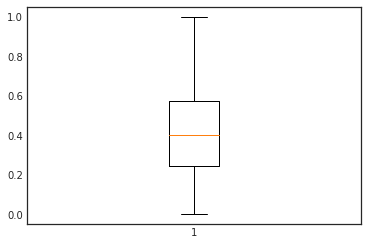

In [45]:
plt.boxplot(my_array)

In [8]:
from PIL import Image
img = Image.open("/data/anyu/BSDS500/data/images/train/100075.jpg")
print(TF.to_tensor(img).shape)
img = Image.open("/data/anyu/BSDS500/data/images/val/376043.jpg")
print(TF.to_tensor(img).shape)

torch.Size([3, 321, 481])
torch.Size([3, 481, 321])


In [9]:
import torch
img = TF.to_tensor(img)
print(img.shape)
print(torch.transpose(img,1,2).shape)

torch.Size([3, 481, 321])
torch.Size([3, 321, 481])


In [13]:
data = np.zeros((3,500,481*321))
print(data.shape)

(3, 500, 154401)


In [14]:
folderpath = "/data/anyu/BSDS500/data/images/train/"
count = 0
for filename in os.listdir(folderpath):
    print(count)
    count += 1
    img = Image.open(folderpath + filename)
    img = TF.to_tensor(img)
    data[0][count] = img[0].flatten()
    data[1][count] = img[1].flatten()
    data[2][count] = img[2].flatten()
folderpath = "/data/anyu/BSDS500/data/images/val/"
for filename in os.listdir(folderpath):
    print(count)
    count += 1
    img = Image.open(folderpath + filename)
    img = TF.to_tensor(img)
    data[0][count] = img[0].flatten()
    data[1][count] = img[1].flatten()
    data[2][count] = img[2].flatten()
folderpath = "/data/anyu/BSDS500/data/images/test/"
for filename in os.listdir(folderpath):
    print(count)
    count += 1
    img = Image.open(folderpath + filename)
    img = TF.to_tensor(img)
    data[0][count] = img[0].flatten()
    data[1][count] = img[1].flatten()
    data[2][count] = img[2].flatten()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: index 500 is out of bounds for axis 0 with size 500

In [15]:
print(data[0].max(), data[0].min(), data[0].mean(), data[0].std())
print(data[1].max(), data[1].min(), data[1].mean(), data[1].std())
print(data[2].max(), data[2].min(), data[2].mean(), data[2].std())

1.0 0.0 0.43158969593646984 0.25209081461328975
1.0 0.0 0.4356949893727021 0.23603794254185614
1.0 0.0 0.36366707870122245 0.24455683929484334


# Thebe

In [1]:
import os
import numpy as np
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import seaborn as sns

[119640  22042 178631 169890 104157]


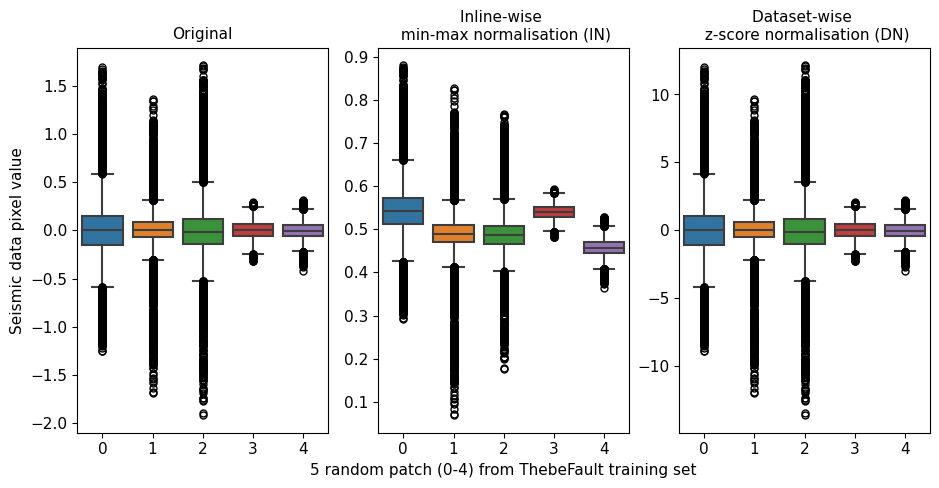

0.2555703669786453 0.5002040639519691 -0.5220774039626122
463 363


<Figure size 500x500 with 0 Axes>

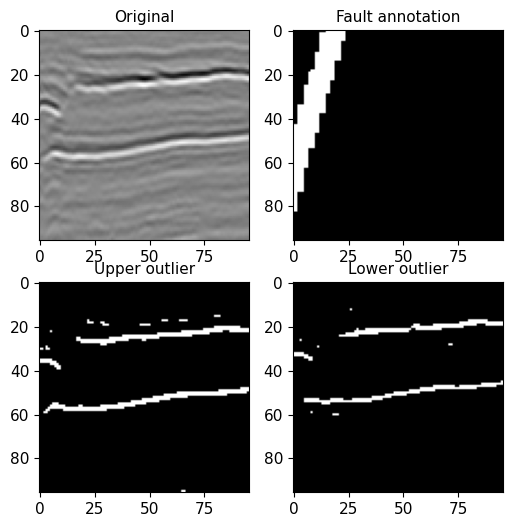

In [16]:
np.random.seed(2023)
randnums= np.random.randint(1,181029,5)
print(randnums)

data = []
folderpath = "/data/anyu/thebeData/processedThebe/train/oriseis/"
for i in randnums:
    img = np.load(folderpath+"{}.npy".format(i))
    data.append(img.flatten())

# sns.boxplot(data=[data[0],data[1], data[2], data[3], data[4]])

dataz = []
folderpath = "/data/anyu/thebeData/processedThebe/train/oriseis/"
for i in randnums:
    img = np.load(folderpath+"{}.npy".format(i))
    img = (img+8.3939)/(9.4332+8.3939)
    img = (img-0.4708)/0.0079
    dataz.append(img.flatten())
    
datain = []
folderpath = "/data/anyu/thebeData/processedThebe/train/seismic/"
for i in randnums:
    img = np.load(folderpath+"{}.npy".format(i))
    datain.append(img.flatten())

fig, axes = plt.subplots(1, 3, figsize = (11,5), sharey=False)
plt.rcParams.update({'font.size': 11})
plt.rc('axes', titlesize=11)
axes[1].set_xlabel("5 random patch (0-4) from ThebeFault training set")
axes[0].set_ylabel("Seismic data pixel value")
axes[1].set_title("Inline-wise \n min-max normalisation (IN)")
axes[0].set_title("Original")
axes[2].set_title("Dataset-wise \n z-score normalisation (DN)")

flierprops = dict(marker='o', markerfacecolor='None', markersize=5,  markeredgecolor='black')
# sns.boxplot(y=df.Column,orient="v",flierprops=flierprops)
    
sns.boxplot(data=[data[0],data[1], data[2], data[3], data[4]],  orient='v' , ax=axes[0],flierprops=flierprops)
sns.boxplot(data=[datain[0],datain[1], datain[2], datain[3], datain[4]],  orient='v' , ax=axes[1],flierprops=flierprops)
sns.boxplot(data=[dataz[0],dataz[1], dataz[2], dataz[3], dataz[4]],  orient='v' , ax=axes[2],flierprops=flierprops)
plt.savefig("boxplot5patch.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(5,5))
patchno = randnums[2]
folderpath = "/data/anyu/thebeData/processedThebe/train/oriseis/"
patchori = np.load(folderpath+"{}.npy".format(patchno))
faultpath = "/data/anyu/thebeData/processedThebe/train/annotation/"
faultpatch = np.load(faultpath+"{}.npy".format(patchno))

my_array = patchori.flatten()
# finding the 1st quartile
q1 = np.quantile(my_array, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(my_array, 0.75)
med = np.median(my_array)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
print((my_array>upper_bound).sum(), (my_array<lower_bound).sum())


fig, axes = plt.subplots(2, 2, figsize = (6,6))

# axes[1].set_xlabel("5 random patch from ThebeFault training set")
# axes[0].set_ylabel("seismic data pixel value")
axes[0,0].set_title("Original")
axes[0,1].set_title("Fault annotation")
axes[1,0].set_title("Upper outlier")
axes[1,1].set_title("Lower outlier")

axes[0,0].imshow(patchori, "gray")
axes[0,1].imshow(faultpatch, "gray")
axes[1,0].imshow(patchori>upper_bound, "gray")
axes[1,1].imshow(patchori<lower_bound, "gray")

plt.savefig("samplepatchoutliter22.png", dpi=300, bbox_inches='tight')

In [4]:
seis = np.zeros((1803,3174,1537))
seis[0:900] = seis1
seis[900:1100] = seis2
seis[1100:] = seis3
print(seis.min(), seis.max(), seis.mean(), seis.std())

-2.3625163563845708e-07 0.12388882423343385


In [6]:
my_array = seis.flatten()
# finding the 1st quartile
q1 = np.quantile(my_array, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(my_array, 0.75)
med = np.median(my_array)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

upperoutlier = (my_array>upper_bound).sum()
loweroutlier = (my_array<lower_bound).sum()

print(upperoutlier, loweroutlier)

0.009204171597957611 0.018693815916776657 -0.018122870475053787
1846393134 1829867230


In [7]:
afterclip = np.clip(my_array, lower_bound, upper_bound)
print(afterclip.max(), afterclip.min(), afterclip.mean(), afterclip.std())
minmaxnorm = (my_array-my_array.min())/(my_array.max()-my_array.min())
print(minmaxnorm.max(), minmaxnorm.min(), minmaxnorm.mean(), minmaxnorm.std())
minmaxnormclip = (afterclip-afterclip.min())/(afterclip.max()-afterclip.min())
print(minmaxnormclip.max(), minmaxnormclip.min(), minmaxnormclip.mean(), minmaxnormclip.std())

0.018693815916776657 -0.018122870475053787 0.00017706434394096734 0.012331301054213565
1.0 0.0 0.47084961705553907 0.006949438877605473
1.0 0.0 0.49705545534994827 0.3349378301713691


In [9]:
print(len(my_array))

8795823714


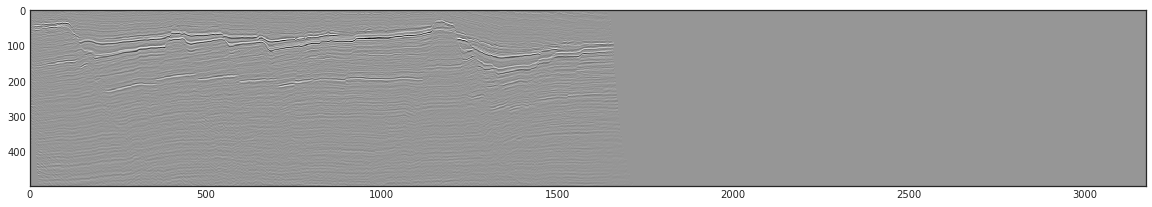

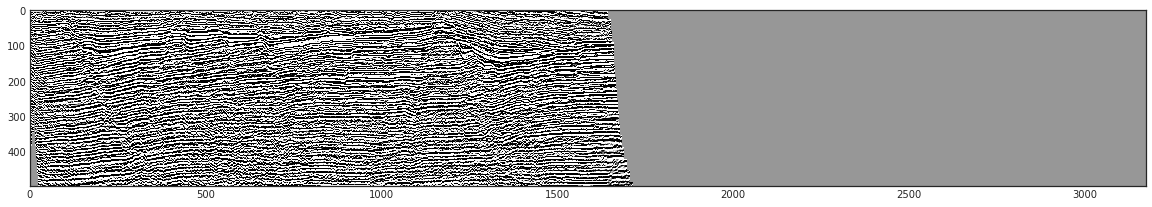

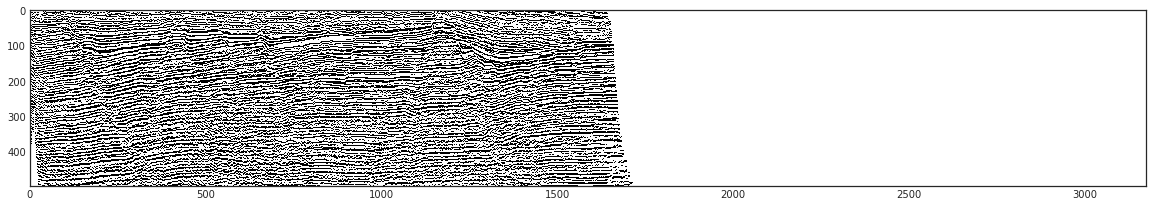

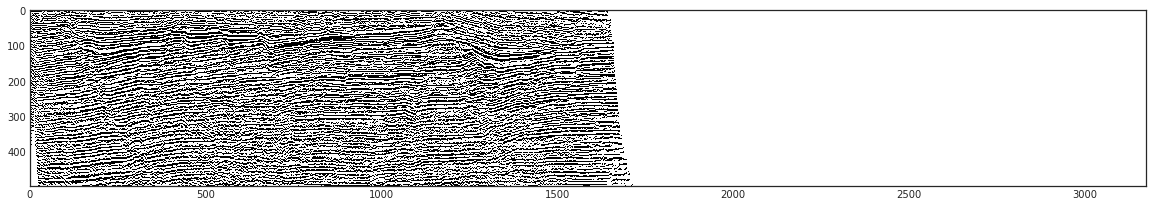

In [15]:
toplot = seis[100].transpose()
plt.figure(figsize=(20,16))
plt.imshow(toplot[800:1300])
plt.figure(figsize=(20,16))
plt.imshow(np.clip(toplot[800:1300], lower_bound, upper_bound))
plt.figure(figsize=(20,16))
plt.imshow(toplot[800:1300]>upper_bound)
plt.figure(figsize=(20,16))
plt.imshow(toplot[800:1300]<lower_bound)


In [2]:
# import segyio
from __future__ import print_function
import os
import sys
import time
from obspy.io.segy.segy import _read_segy, SEGYBinaryFileHeader
from obspy import read
import numpy as np

filename = '/data/anyu/Thebe/OilData/TrainingData/P00675589/FILE_000001.sgy'

In [3]:
t0=time.time()
print('sgy use read:')
stream = read(filename)
print('--> data read in {:.1f} min'.format((time.time()-t0)/60))

sgy use read:
--> data read in 34.3 min


In [4]:
print(stream)
print(len(stream))

4398078 Trace(s) in Stream:

Seq. No. in line:    1 | 2007-01-01T00:00:00.000000Z - 2007-01-01T00:00:04.608000Z | 333.3 Hz, 1537 samples
...
(4398076 other traces)
...
Seq. No. in line: 2130793 | 2007-01-01T00:00:00.000000Z - 2007-01-01T00:00:04.608000Z | 333.3 Hz, 1537 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
4398078


In [5]:
datalist = []
t0 = time.time()
for i in range(len(stream)):  
    datalist.extend(stream[i].data)
print('--> data read in {:.1f} min'.format((time.time()-t0)/60))

--> data read in 10.3 min


In [6]:
my_array = np.asarray(datalist)
print(my_array.shape)
print(my_array.max(), my_array.min(), my_array.mean(), my_array.std())

(6759845886,)
9.433253288269043 -8.393916130065918 -3.2571823809367877e-07 0.1413724055152636


In [7]:
# finding the 1st quartile
q1 = np.quantile(my_array, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(my_array, 0.75)
med = np.median(my_array)
 
# finding the iqr region
iqr = q3-q1
print(iqr)
 
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

upperoutlier = (my_array>upper_bound).sum()
loweroutlier = (my_array<lower_bound).sum()

print(upperoutlier, loweroutlier)

upper_bound3iqr = q3+(3*iqr)
lower_bound3iqr = q1-(3*iqr)
print(upper_bound3iqr, lower_bound3iqr)

upperoutlier3iqr = (my_array>upper_bound3iqr).sum()
loweroutlier3iqr = (my_array<lower_bound3iqr).sum()

print(upperoutlier3iqr, loweroutlier3iqr)

0.055183228105306625
0.11110434122383595 -0.10962857119739056
714150183 725585812
0.19387918338179588 -0.1924034133553505
305116058 320900306


In [8]:
afterclip = np.clip(my_array, lower_bound, upper_bound)
print(afterclip.max(), afterclip.min(), afterclip.mean(), afterclip.std())
afterclip3iqr = np.clip(my_array, lower_bound3iqr, upper_bound3iqr)
print(afterclip3iqr.max(), afterclip3iqr.min(), afterclip3iqr.mean(), afterclip3iqr.std())

0.11110434122383595 -0.10962857119739056 0.00039872627774390217 0.06301541238315657
0.19387918338179588 -0.1924034133553505 0.00021618227779064662 0.08614840201595432


MemoryError: Unable to allocate 50.4 GiB for an array with shape (6759845886,) and data type float64

In [15]:
minmaxnorm = (my_array-my_array.min())/(my_array.max()-my_array.min())
print(minmaxnorm.max(), minmaxnorm.min(), minmaxnorm.mean(), minmaxnorm.std())
minmaxnormclip = (afterclip-afterclip.min())/(afterclip.max()-afterclip.min())
print(minmaxnormclip.max(), minmaxnormclip.min(), minmaxnormclip.mean(), minmaxnormclip.std())
minmaxnormclip3iqr = (afterclip3iqr-afterclip3iqr.min())/(afterclip3iqr.max()-afterclip3iqr.min())
print(minmaxnormclip3iqr.max(), minmaxnormclip3iqr.min(), minmaxnormclip3iqr.mean(), minmaxnormclip3iqr.std())

1.0 0.0 0.4708496120373496 0.007930165591507873
1.0 0.0 0.49846348815064656 0.2854826300796672
1.0 0.0 0.49864942728500017 0.22301911280403097


In [10]:
print(len(stream))

4398078


In [13]:
stream = None
datalist = None

In [14]:
import gc
gc.collect()

0

In [9]:
print(my_array.shape)

(6759845886,)


In [53]:
fault1 = np.load("/data/anyu/thebeData/thebeorigin/faulttrain.npy")
fault2 = np.load("/data/anyu/thebeData/thebeorigin/faultval.npy")
fault3 = np.load("/data/anyu/thebeData/thebeorigin/faulttest.npy")

fault = np.zeros((1803,3174,1537))
fault[0:900] = fault1
fault[900:1100] = fault2
fault[1100:] = fault3
print(fault.sum())
print((fault.sum()/(1803*3174*1537)))

120974021.0
0.013753574984392872


In [16]:
data_folder = "/data/anyu/thebeData"
processed_data_folder = "{}/processedThebe".format(data_folder)

-0.6536887884140015 0.7001119256019592


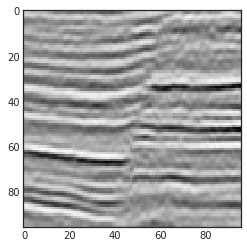

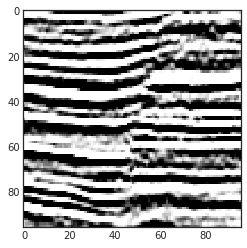

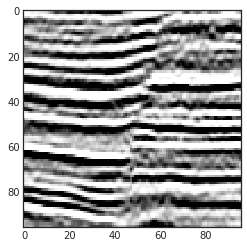

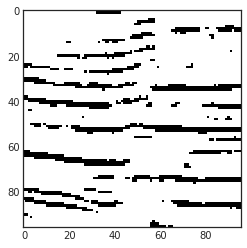

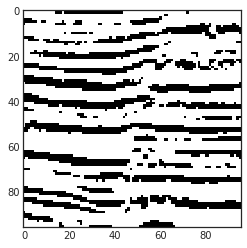

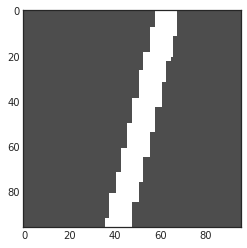

In [21]:
i = 400
seisori = np.load("{}/val/oriseis/{}.npy".format(processed_data_folder, i))
mask = np.load("{}/val/annotation/{}.npy".format(processed_data_folder, i))
plt.figure(figsize=(4,4))
plt.imshow(seisori)
plt.figure(figsize=(4,4))
plt.imshow(np.clip(seisori, -0.10, 0.10))
plt.figure(figsize=(4,4))
plt.imshow(np.clip(seisori, -0.20, 0.20))
plt.figure(figsize=(4,4))
plt.imshow(seisori> 0.20)
plt.figure(figsize=(4,4))
plt.imshow(seisori> 0.1)
plt.figure(figsize=(4,4))
plt.imshow(mask, 'gray', alpha=0.7)
# print(seis.min(), seis.max())
print(seisori.min(), seisori.max())

Text(0.5, 1.0, 'GSB Histogram')

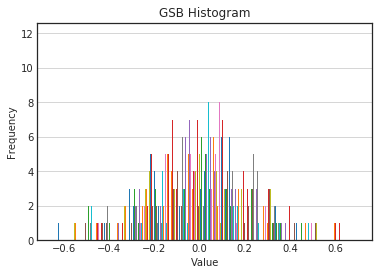

In [22]:
n, bins, patches = plt.hist(x=seisori, bins='auto')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('GSB Histogram')

-1.097259521484375 1.2472381591796875


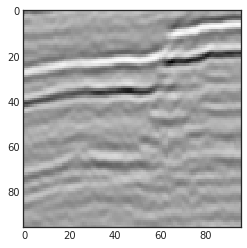

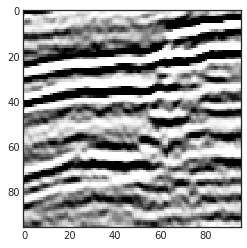

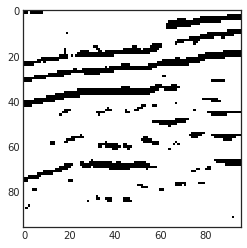

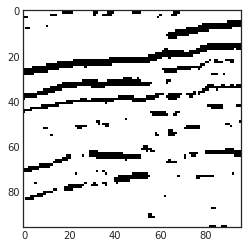

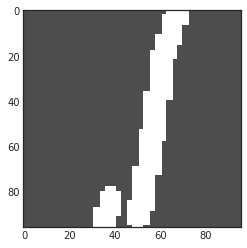

In [26]:
i = 23390
seisori = np.load("{}/train/oriseis/{}.npy".format(processed_data_folder, i))
mask = np.load("{}/train/annotation/{}.npy".format(processed_data_folder, i))
plt.figure(figsize=(4,4))
plt.imshow(seisori)
plt.figure(figsize=(4,4))
plt.imshow(np.clip(seisori, -0.20, 0.20))
plt.figure(figsize=(4,4))
plt.imshow(seisori> 0.20)
plt.figure(figsize=(4,4))
plt.imshow(seisori< -0.2)
plt.figure(figsize=(4,4))
plt.imshow(mask, 'gray', alpha=0.7)
# print(seis.min(), seis.max())
print(seisori.min(), seisori.max())
# plt.axis('off')